# Proyecto final: Designing and implementing a deep learning model for a real-world application using TensorFlow and Python

*   Universidad de Monterrey
*   Cristopher Hildebrand Sánchez
*   Troy Alejandro Urdiales García
*   Diego Delgado Dragustinovis
*   Inteligencia Artificial 2
*   Dr Andrés Hernández Gutiérrez
*   Domingo 8 de diciembre del 2024, San Pedro Garza García, Nuevo León
---



## Objetivo

El objetivo de este proyecto es diseñar e implementar un modelo de aprendizaje profundo utilizando TensorFlow y Python para la clasificación automática de escenas naturales en imágenes. Este modelo servirá como base para el desarrollo de futuras aplicaciones del mundo real que permitan a los usuarios obtener descripciones detalladas de sus fotografías a través de dispositivos móviles. Específicamente, al tomar una foto con un teléfono celular equipado con geolocalización, una aplicación futura basada en este modelo analizará la imagen y proporcionará una descripción contextual, indicando la ubicación aproximada (por ejemplo, "te tomaste una foto en la calle X") y el ambiente de fondo presente en la escena. Esta funcionalidad tiene aplicaciones prácticas en áreas como el turismo, la documentación ambiental y la organización personal de fotografías, mejorando la experiencia del usuario al proporcionar información relevante y contextualizada de manera automática.

# Marco Teórico
## Introducción al Problema
En la era digital actual, la clasificación automática de imágenes se ha convertido en una herramienta
fundamental para diversas aplicaciones en múltiples sectores, incluyendo la medicina, la seguridad, la
agricultura y la gestión ambiental. Específicamente, la clasificación de escenas naturales, como la
distinción entre bosques, playas, montañas y ciudades, es crucial para tareas como el monitoreo
ambiental, la planificación urbana y la gestión de recursos naturales. La capacidad de identicar y
categorizar automáticamente diferentes tipos de escenas a partir de imágenes contribuye
significativamente a la eficiencia y precisión en la toma de decisiones en estos campos (Russakovsky et
al., 2015).
## Importancia de la Aplicación
La clasificación de escenas naturales tiene una relevancia significativa en la conservación del medio
ambiente y en la planificación urbana sostenible. Por ejemplo, en la gestión de parques nacionales, la
identificación precisa de diferentes tipos de paisajes permite un monitoreo más efectivo de los cambios
ambientales y de la biodiversidad. Además, en el ámbito urbano, la clasificación de imágenes satelitales
ayuda en la planificación y expansión de infraestructuras, asegurando un desarrollo equilibrado y
respetuoso con el entorno natural (Zhu et al., 2017).

## Desafíos Principales
La clasificación de imágenes de escenas naturales presenta varios desafíos técnicos y prácticos:
1. Variabilidad de las Escenas: Las escenas naturales pueden variar significativamente debido a
factores como la iluminación, las estaciones del año y las condiciones climáticas, lo que dificulta la
generalización de los modelos de clasificación (Goodfellow, Bengio & Courville, 2016).
2. Alta Dimensionalidad de los Datos: Las imágenes de alta resolución contienen una gran cantidad
de información, lo que aumenta la complejidad computacional y la necesidad de modelos
eficientes que puedan manejar esta dimensionalidad sin sacrificar el rendimiento (LeCun, Bengio &
Hinton, 2015).
3. Recolección y Etiquetado de Datos: Obtener y etiquetar una gran cantidad de imágenes
representativas de cada clase es una tarea laboriosa y costosa, lo que limita la disponibilidad de
datos de alta calidad para el entrenamiento de modelos (Krizhevsky, Sutskever & Hinton, 2012).
4. Sobrecarga y Subajuste: Los modelos de aprendizaje profundo son propensos al sobreajuste,
donde el modelo aprende patrones específicos del conjunto de entrenamiento pero falla en
generalizar a datos no vistos, o al subajuste, donde el modelo no captura suficientemente la
complejidad de los datos (Goodfellow et al., 2016).

## Rol del Deep Learning en Abordar Estos Desafíos
El aprendizaje profundo (deep learning) ha demostrado ser una solución efectiva para superar los
desafíos asociados con la clasificación de imágenes de alta dimensionalidad y variabilidad. Las redes
neuronales profundas, especialmente las redes neuronales convolucionales (CNNs), han revolucionado
el campo de la visión por computadora gracias a su capacidad para aprender representaciones
jerárquicas de datos visuales de manera automática y eficiente (LeCun et al., 2015).
### Redes Neuronales Convolucionales (CNNs)
Las CNNs son especialmente adecuadas para tareas de clasificación de imágenes debido a su capacidad
para capturar patrones espaciales y estructurales en los datos visuales. Estas redes utilizan capas
convolucionales que aplican filtros para extraer características relevantes, seguidas de capas de
agrupamiento que reducen la dimensionalidad y aumentan la robustez frente a variaciones en la
imagen (Krizhevsky et al., 2012).
### Transferencia de Aprendizaje
La transferencia de aprendizaje es una técnica que permite reutilizar un modelo preentrenado en una
tarea relacionada, adaptándolo a un nuevo problema con una cantidad limitada de datos. Este enfoque
es particularmente útil en la clasificación de imágenes, donde modelos como VGG16, previamente
entrenados en grandes conjuntos de datos como ImageNet, pueden ser ajustados para tareas
específicas de clasificación de escenas naturales. La transferencia de aprendizaje reduce
significativamente el tiempo de entrenamiento y mejora el rendimiento del modelo, especialmente
cuando los datos disponibles son escasos (Yosinski et al., 2014).
### VGG16
VGG16 es una arquitectura de CNN desarrollada por el Visual Geometry Group de la Universidad de
Oxford, conocida por su simplicidad y eficacia. Consiste en 16 capas de profundidad, incluyendo capas
convolucionales y de agrupamiento, seguidas de capas completamente conectadas para la clasificación.
Su diseño modular facilita la transferencia de aprendizaje, permitiendo que las capas convolucionales
extraídas aprendan características generales de las imágenes que pueden ser aplicadas a diversas
tareas de clasificación (Simonyan & Zisserman, 2014).



# Desarrollo del proyecto

## 1. Importación y análisis de datos

En esta celda se importan todas las bibliotecas necesarias para el proyecto de clasificación de imágenes.
Se incluyen librerías para manipulación de archivos (`os`), cálculo numérico (`numpy`), visualización de
datos (`matplotlib.pyplot` y `seaborn`), y herramientas de aprendizaje profundo (`tensorflow` y sus
submódulos). Además, se importan funciones para evaluar el rendimiento del modelo, como
`classification_report` y `confusion_matrix` de `sklearn.metrics`.
Finalmente, se imprime la versión de TensorFlow utilizada, lo que es útil para asegurar la compatibilidad
de código y reproducibilidad de resultados.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.1


En esta celda se utiliza la biblioteca `kagglehub` para descargar el conjunto de datos "intel-imageclassication" de Kaggle. La función `dataset_download` descarga la última versión del dataset y devuelve
la ruta donde se han almacenado los archivos.
La impresión de la ruta del dataset es útil para verificar que los datos se han descargado correctamente
y para facilitar el acceso posterior a los archivos durante la organización y el procesamiento de los datos.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

100%|██████████| 346M/346M [00:02<00:00, 142MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


Esta celda organiza la estructura de carpetas del conjunto de datos descargado para facilitar el acceso
durante el entrenamiento del modelo. Se definen las rutas de origen (`source_train` y `source_test`)
donde se encuentran las imágenes de entrenamiento y prueba respectivamente, y las rutas de destino
(`train_dir` y `test_dir`) donde se copiarán las imágenes organizadas por clases.
La función `organize_data` copia las imágenes de cada clase desde las carpetas de origen a las carpetas
de destino, creando las carpetas de clase si no existen. Después de reorganizar los datos, se imprime
una confirmación.
Finalmente, se verifica la estructura del directorio de entrenamiento listando las clases disponibles y
contando el número de imágenes por clase, lo que ayuda a asegurar que los datos están correctamente
organizados y balanceados para el entrenamiento.


In [ ]:
import os
import shutil

# Ruta base al conjunto de datos
base_path = "/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2"

# Rutas a los directorios fuente
source_train = os.path.join(base_path, "seg_train/seg_train")
source_test = os.path.join(base_path, "seg_test/seg_test")

# Rutas a los directorios de destino
target_base = "./data"
train_dir = os.path.join(target_base, "seg_train")
test_dir = os.path.join(target_base, "seg_test")

# Asegurarse de que los directorios de destino existan
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Función para copiar archivos del origen al destino
def organize_data(src_dir, dest_dir):
    for class_name in os.listdir(src_dir):
        src_class_path = os.path.join(src_dir, class_name)
        dest_class_path = os.path.join(dest_dir, class_name)

        # Crear el directorio de la clase en el destino si no existe
        os.makedirs(dest_class_path, exist_ok=True)

        # Mover todas las imágenes del directorio de la clase fuente al destino
        for file_name in os.listdir(src_class_path):
            shutil.copy(
                os.path.join(src_class_path, file_name),
                os.path.join(dest_class_path, file_name)
            )

# Organizar datos de entrenamiento y prueba
organize_data(source_train, train_dir)
organize_data(source_test, test_dir)

print("Data reorganized successfully!")

# Verificar la estructura
classes = os.listdir(train_dir)
print("Classes in training directory:", classes)

for c in classes:
    class_path = os.path.join(train_dir, c)
    print(c, ":", len(os.listdir(class_path)))



Data reorganized successfully!
Classes in training directory: ['street', 'glacier', 'forest', 'sea', 'buildings', 'mountain']
street : 2382
glacier : 2404
forest : 2271
sea : 2274
buildings : 2191
mountain : 2512


En esta celda se define y ejecuta una función para visualizar muestras aleatorias de una clase específica
del conjunto de datos de entrenamiento. La función `display_samples` toma el nombre de una clase, la
ruta del directorio de entrenamiento y el número de muestras a mostrar.
Se seleccionan aleatoriamente tres imágenes de la clase 'forest' y se muestran en una figura utilizando
`matplotlib`. Esto permite inspeccionar visualmente las imágenes del conjunto de datos, asegurando
que las clases están correctamente etiquetadas y que las imágenes son variadas y representativas.


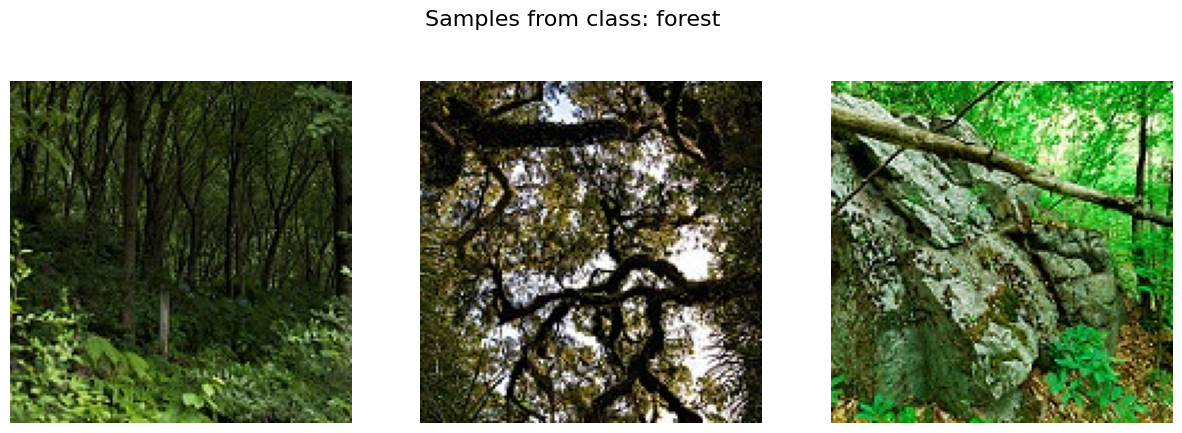

In [ ]:
import random
from PIL import Image
def display_samples(class_name, train_dir, num_samples=3):
  class_path = os.path.join(train_dir, class_name)
  samples = random.sample(os.listdir(class_path), num_samples)
  fig, axes = plt.subplots(1, num_samples, figsize=(15,5))
  for i, sample in enumerate(samples):
    img_path = os.path.join(class_path, sample)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
  plt.suptitle(f"Samples from class: {class_name}", fontsize=16)
  plt.show()
display_samples('forest', train_dir)

Esta celda configura los generadores de datos para el entrenamiento, validación y prueba del modelo
utilizando `ImageDataGenerator` de Keras. Se define el tamaño de las imágenes (`IMG_SIZE`) y el tamaño
de los lotes (`BATCH_SIZE`).
Para el conjunto de entrenamiento, se aplica una serie de transformaciones de aumento de datos
(rotaciones, desplazamientos y volteos horizontales) para mejorar la generalización del modelo.
Además, se establece una división del 20% de los datos de entrenamiento para validación.
Para el conjunto de prueba, solo se realiza la reescalación de los valores de píxeles. Los generadores se
crean utilizando `flow_from_directory`, que carga las imágenes directamente desde los directorios
organizados previamente.
Finalmente, se imprime el mapeo de índices de clases y se determina el número total de clases, lo que
es esencial para denir la arquitectura del modelo de red neuronal.

In [ ]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
# ImageDataGenerators con data augmentation para el entrenamiento
train_datagen = ImageDataGenerator(
  rescale=1./255,
  validation_split=0.2, # 20% de los datos de entrenamiento se separan para validación
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
# Crear generadores de imagenes de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
  class_mode='categorical',
  subset='training'
)
val_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
  class_mode='categorical',
  subset='validation'
)
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
  class_mode='categorical',
  shuffle=False
)
class_indices = train_generator.class_indices
print("Class indices:", class_indices)
num_classes = len(class_indices)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Class indices: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


## 2. Desarrollo del modelo

En esta celda se construye el modelo de red neuronal para la clasificación de imágenes utilizando
transferencia de aprendizaje con el modelo preentrenado VGG16.
1. Carga de VGG16: Se carga el modelo VGG16 sin la capa superior de clasificación
(`include_top=False`) y con pesos preentrenados en el conjunto de datos ImageNet. La entrada se
ajusta al tamaño de las imágenes definido anteriormente.
2. Congelación de capas: Se congela el modelo base (`base_model.trainable = False`) para evitar
que sus pesos se actualicen durante el entrenamiento, lo que reduce el tiempo de entrenamiento y
evita el sobreajuste.
3. Capas personalizadas: Se añaden capas adicionales al modelo:
`Flatten`: Aplana las salidas del modelo base.
`Dense`: Capa densa con 256 unidades y activación ReLU para aprender representaciones
complejas.
`Dropout`: Regularización con una tasa de abandono del 50% para prevenir el sobreajuste.
`Dense`: Capa de salida con activación softmax que produce probabilidades para cada clase.
4. Compilación del modelo: Se compila el modelo usando la pérdida de entropía cruzada categórica,
el optimizador Adam con una tasa de aprendizaje de 1e-4 y se monitorea la métrica de precisión.
Finalmente, se imprime el resumen del modelo, mostrando la arquitectura y el número de parámetros,
lo que ayuda a verificar que el modelo está correctamente configurado.


In [ ]:
# Cargar VGG16 (sin la capa de clasificación superior)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.trainable = False # Congelar las capas del modelo base
# Crear capas superiores personalizadas
model = models.Sequential([
  base_model,
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.Adam(learning_rate=1e-4),
  metrics=['accuracy']
)
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,813,638 (64.14 MB)

 Trainable params: 2,098,950 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Esta celda entrena el modelo definido previamente utilizando los generadores de datos de
entrenamiento y validación.
1. Callbacks:
`EarlyStopping`: Detiene el entrenamiento si la pérdida de validación (`val_loss`) no mejora
durante 5 épocas consecutivas, lo que ayuda a prevenir el sobreajuste y reduce el tiempo de
entrenamiento.
`ReduceLROnPlateau`: Reduce la tasa de aprendizaje en un factor de 0.2 si la pérdida de
validación no mejora durante 3 épocas, permitiendo una convergencia más fina del modelo.
2. Entrenamiento del modelo: Se entrena el modelo durante un máximo de 20 épocas, utilizando
los datos de entrenamiento y validación. Los callbacks mencionados supervisan el rendimiento y
ajustan el entrenamiento en consecuencia.
El historial de entrenamiento (`history`) almacena las métricas de precisión y pérdida para cada época,
lo que será útil para analizar el rendimiento del modelo posteriormente.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
history = model.fit(
  train_generator,
  epochs=20,
  validation_data=val_generator,
  callbacks=[early_stop, reduce_lr]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 117s 299ms/step - accuracy: 0.6267 - loss: 0.9823 - val_accuracy: 0.8395 - val_loss: 0.4546 - learning_rate: 1.0000e-04
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 118s 256ms/step - accuracy: 0.8110 - loss: 0.5099 - val_accuracy: 0.8420 - val_loss: 0.4300 - learning_rate: 1.0000e-04
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 92s 255ms/step - accuracy: 0.8364 - loss: 0.4543 - val_accuracy: 0.8434 - val_loss: 0.4194 - learning_rate: 1.0000e-04
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 141s 257ms/step - accuracy: 0.8472 - loss: 0.4341 - val_accuracy: 0.8584 - val_loss: 0.3851 - learning_rate: 1.0000e-04
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 94s 264ms/step - accuracy: 0.8543 - loss: 0.4025 - val_accuracy: 0.8573 - val_loss: 0.3968 - learning_rate: 1.0000e-04
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 91s 256ms/step - accuracy: 0.8556 - loss: 0.3764 - val_accuracy: 0.8645 - val_loss: 0.3773 - learning_rate: 1.0000e-04
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 90s 253ms/step

Los resultados después del entrenamiento a lo largo de 20 épocas son:

1. **Precisión (accuracy):** La precisión en los datos de entrenamiento y validación mejora constantemente hasta alcanzar un valor alto (>90%), indicando que el modelo está aprendiendo correctamente.

2. **Pérdida (loss):** La pérdida tanto en entrenamiento como en validación disminuye progresivamente, lo que sugiere que el modelo está ajustando bien sus predicciones.

3. **Tasa de aprendizaje:** En la época 16, se activa el ajuste de la tasa de aprendizaje mediante `ReduceLROnPlateau`, lo que reduce la tasa de aprendizaje para evitar que el modelo se estanque o pierda precisión.

El modelo está convergiendo de manera efectiva y el ajuste dinámico de la tasa de aprendizaje mejora la optimización en las últimas etapas del entrenamiento.

## 3. Métricas de rendimiento

En esta celda se evalúa el rendimiento del modelo entrenado en el conjunto de datos de prueba. La
función `evaluate` calcula la pérdida y la precisión del modelo en los datos de prueba, proporcionando
una medida objetiva de su capacidad para generalizar a datos no vistos durante el entrenamiento.
La impresión de la pérdida de prueba (`Test Loss`) y la precisión de prueba (`Test Accuracy`) permite
cuantificar el desempeño del modelo y compararlo con otras configuraciones o modelos diferentes.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.8999 - loss: 0.2626
Test Loss: 0.3085233271121979
Test Accuracy: 0.878333330154419


1. **Precisión en prueba (Test Accuracy):** El modelo alcanza un 87.83% de precisión en los datos de prueba, lo cual es consistente con los resultados obtenidos durante el entrenamiento y validación, mostrando que el modelo generaliza bien a datos no vistos.

2. **Pérdida en prueba (Test Loss):** La pérdida es de 0.3085, indicando un buen ajuste del modelo.

El modelo tiene un desempeño sólido en el conjunto de prueba, con una alta precisión y una pérdida baja, lo que sugiere que está bien entrenado y no está sobreajustado.

Esta celda genera un gráfico que muestra la evolución de la precisión del modelo durante el
entrenamiento y la validación a lo largo de las épocas.

#### Ejes:

*   X: Número de épocas.
*   Y: Precisión.

#### Curvas:


*   Train Accuracy: Precisión en los datos de entrenamiento.
*   Validation Accuracy: Precisión en los datos de validación.



El gráfico ayuda a visualizar cómo el modelo está aprendiendo con el tiempo y a identificar posibles
problemas como el sobreajuste (cuando la precisión de entrenamiento es mucho mayor que la de
validación) o la suboptimización (cuando ambas precisiones son bajas).

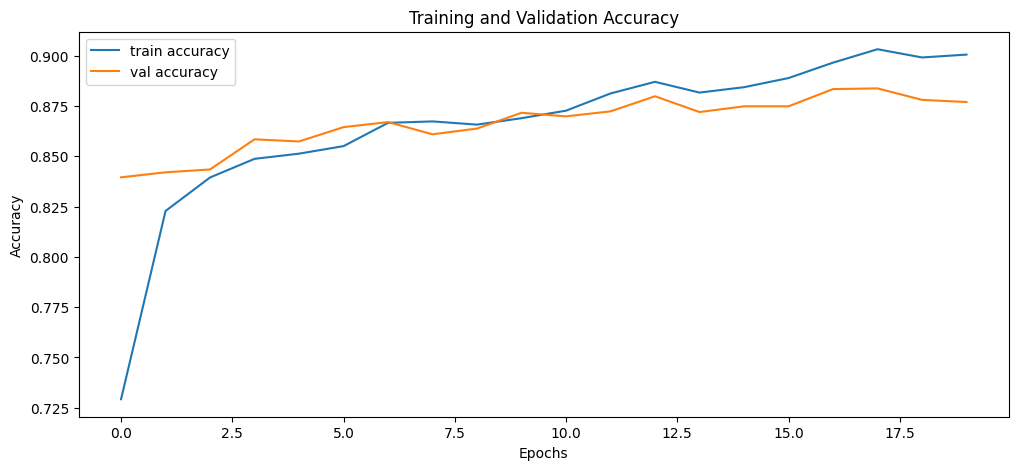

In [ ]:
# Precisión de entrenamiento y validación
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()



Este gráfico muestra la evolución de la precisión (accuracy) durante el entrenamiento y la validación del modelo a lo largo de las épocas.

1. **Crecimiento consistente:** Tanto la precisión de entrenamiento como la de validación mejoran a lo largo de las épocas, lo que indica que el modelo está aprendiendo progresivamente.

2. **Validación estable:** La curva de validación (naranja) se estabiliza rápidamente y se mantiene cercana a la de entrenamiento (azul), lo que sugiere que el modelo no está sobreajustado.

3. **Pequeña brecha:** Hay una ligera brecha entre las precisiones de entrenamiento y validación en las últimas épocas, lo cual es normal y muestra que el modelo está bien generalizado.

El modelo tiene un buen desempeño, con precisión de entrenamiento y validación altas y consistentes, lo que indica que está aprendiendo sin sobreajustarse. Esta estabilidad sugiere que las estrategias de regularización y el ajuste de hiperparámetros están funcionando adecuadamente.

En esta celda se crea un gráfico que muestra la evolución de la pérdida (loss) del modelo durante el
entrenamiento y la validación a lo largo de las épocas.
#### Ejes:

*   X: Número de épocas.
*   Y: Pérdida.


#### Curvas:

*   Train Loss: Pérdida en los datos de entrenamiento.
*   Validation Loss: Pérdida en los datos de validación.



Este gráfico es crucial para evaluar el comportamiento del modelo. Una disminución constante de la
pérdida en ambos conjuntos indica un buen aprendizaje. Si la pérdida de validación comienza a
aumentar mientras la de entrenamiento sigue disminuyendo, puede ser señal de sobreajuste.

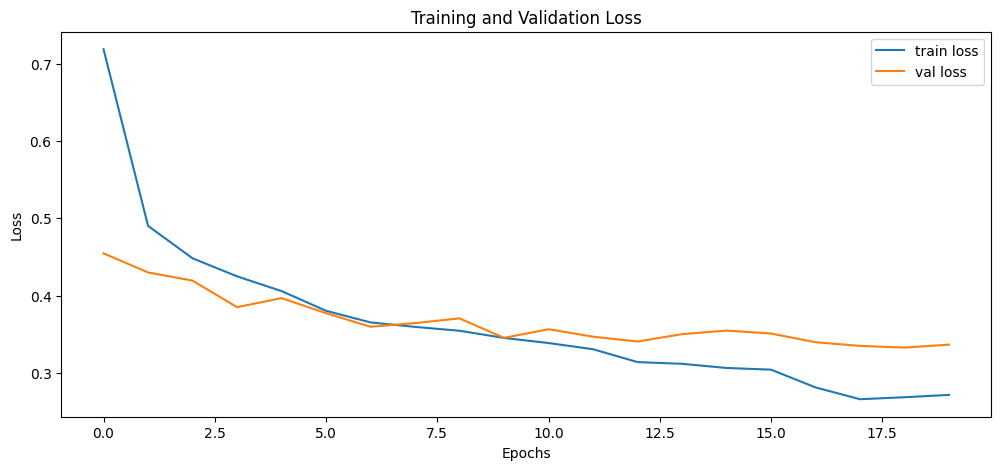

In [ ]:
# Pérdida de entrenamiento y validación
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Este gráfico muestra la evolución de la pérdida (loss) durante el entrenamiento y la validación del modelo a lo largo de las épocas.

1. **Reducción consistente de la pérdida:** La pérdida de entrenamiento (azul) disminuye de forma constante, lo que indica que el modelo está aprendiendo a minimizar el error en los datos de entrenamiento.

2. **Estabilidad de la validación:** La pérdida de validación (naranja) también disminuye al principio, pero se estabiliza en las últimas épocas, lo que sugiere que el modelo ha alcanzado un punto óptimo en términos de aprendizaje.

3. **Pequeña brecha:** Hay una ligera diferencia entre la pérdida de entrenamiento y validación en las últimas épocas. Esto es normal y muestra que el modelo generaliza bien sin signos evidentes de sobreajuste.

El modelo está bien ajustado, con una pérdida en validación baja y estable. Esto indica que las estrategias utilizadas (como regularización o ajuste de hiperparámetros) están funcionando correctamente para prevenir el sobreajuste y garantizar un buen rendimiento en datos no vistos.

Esta celda realiza predicciones sobre el conjunto de datos de prueba y evalúa el rendimiento del modelo
mediante un informe de clasificación.
1. Predicciones:
Se reinicia el generador de prueba para asegurar que las predicciones se realicen desde el
inicio.
`model.predict` genera las probabilidades para cada clase.
`np.argmax` convierte las probabilidades en etiquetas de clase predichas.
2. Etiquetas verdaderas: Se obtienen las etiquetas verdaderas de las clases desde el generador de
prueba.
3. Informe de clasificación: Utilizando `classification_report` de `sklearn.metrics`, se genera un
informe que incluye métricas como precisión, recall y F1-score para cada clase. Esto proporciona
una visión detallada del desempeño del modelo en cada categoría, identificando posibles clases
que el modelo clasifica mejor o peor.


In [ ]:
# Predicciones en los datos de entrenamiento
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
# Reporte de clasificación
target_names = list(class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step
              precision    recall  f1-score   support

   buildings       0.89      0.91      0.90       437
      forest       0.97      0.98      0.97       474
     glacier       0.79      0.86      0.82       553
    mountain       0.85      0.75      0.79       525
         sea       0.88      0.88      0.88       510
      street       0.92      0.91      0.91       501

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



Este cuadro muestra las métricas de evaluación del modelo en el conjunto de prueba, desglosadas por clase.

1. **Precisión (Precision):** Indica la proporción de predicciones correctas para cada clase. La precisión es alta en general (valores cercanos a 0.9), con una excepción menor en la clase "glacier" (0.79), lo que sugiere que el modelo tiene más dificultad para predecir correctamente esta clase.

2. **Exhaustividad (Recall):** Mide la proporción de casos reales correctamente identificados. También es alta en general, con un desempeño ligeramente menor en las clases "glacier" (0.86) y "mountain" (0.75).

3. **Puntaje F1 (F1-Score):** Combina precisión y exhaustividad en un solo indicador. Los puntajes F1 son consistentes y altos (~0.88 en promedio), con una ligera debilidad en "mountain" (0.79).

4. **Soporte (Support):** Muestra el número de muestras por clase en el conjunto de prueba. Esto indica un balance relativamente equitativo entre las clases.

5. **Promedios generales:**
   - **Accuracy:** 0.88, lo que refleja un buen desempeño general del modelo.
   - **Macro avg:** Promedio simple de las métricas por clase, mostrando equidad en el desempeño entre clases.
   - **Weighted avg:** Promedio ponderado basado en el soporte, útil en casos de clases desbalanceadas.

En esta celda se genera y visualiza la matriz de confusión del modelo en el conjunto de datos de prueba.
1. Cálculo de la matriz de confusión: `confusion_matrix` compara las etiquetas verdaderas
(`y_true`) con las predichas (`y_pred`), creando una matriz donde cada fila representa las
instancias de la clase verdadera y cada columna las predichas.
2. Función `plot_confusion_matrix`:
   * Visualización: Utiliza `matplotlib` para mostrar la matriz de confusión como una imagen de
calor (heatmap).
   * Etiquetas: Los nombres de las clases se muestran en los ejes X e Y para facilitar la
interpretación.
   * Normalización (opcional): Permite mostrar proporciones en lugar de conteos absolutos.
   * Anotaciones: Cada celda de la matriz muestra el número de predicciones, con colores que facilitan la identificación de valores altos o bajos.

   
La matriz de confusión es una herramienta valiosa para identificar patrones de errores del modelo,
como clases que son comúnmente confundidas entre sí, lo que puede indicar la necesidad de mejorar el
modelo o la calidad de los datos para esas clases específicas.


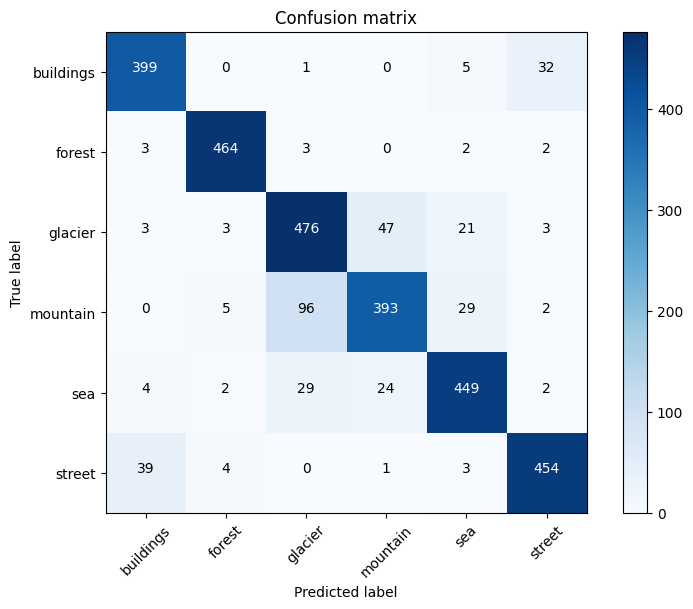

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
plot_confusion_matrix(cm, target_names)


La **matriz de confusión** proporciona un desglose detallado de las predicciones correctas e incorrectas para cada clase.

1. **Diagonales principales:** Los valores en la diagonal representan las predicciones correctas por clase. Por ejemplo:
   - "Buildings" tiene 399 predicciones correctas.
   - "Forest" tiene 464 predicciones correctas.
   - "Glacier" tiene 476 predicciones correctas.

   Estos números indican que el modelo tiene un buen desempeño general.

2. **Errores notables:**
   - **"Mountain":** Tiene 96 instancias clasificadas incorrectamente como "Glacier". Esto indica que el modelo confunde frecuentemente estas dos clases.
   - **"Street":** 39 instancias de "Buildings" se clasificaron incorrectamente como "Street", lo que puede deberse a similitudes visuales entre estas clases.

3. **Clases con menor confusión:**
   - "Forest" y "Sea" tienen relativamente pocos errores de clasificación hacia otras clases, lo que muestra que estas clases están bien diferenciadas.

El modelo tiene un buen desempeño en la mayoría de las clases, pero presenta confusión entre clases similares como "Mountain" y "Glacier". Esto podría mejorarse utilizando más datos de entrenamiento o características específicas para estas clases.

## 4. Resultados

Esta celda visualiza algunas predicciones del modelo comparándolas con las etiquetas reales, lo que
permite una evaluación cualitativa del rendimiento del modelo.
1. Mapeo de clases: Se invierte el diccionario `class_indices` para obtener una correspondencia de
índices a nombres de clases, facilitando la interpretación de las etiquetas.
2. Selección aleatoria de muestras: Se eligen cinco imágenes al azar del conjunto de prueba para
visualizar.
3. Visualización:
   * Para cada muestra seleccionada, se carga la imagen y se obtiene la etiqueta verdadera y la
predicha.
   * Se muestra la imagen con un título que indica la predicción y la etiqueta real.
   * El color del título es verde si la predicción es correcta y rojo si es incorrecta, proporcionando
una rápida referencia visual de la precisión del modelo en esas muestras específicas.


Esta visualización ayuda a identificar visualmente patrones de error y a comprender mejor en qué tipos
de imágenes el modelo funciona bien o tiene dificultades.


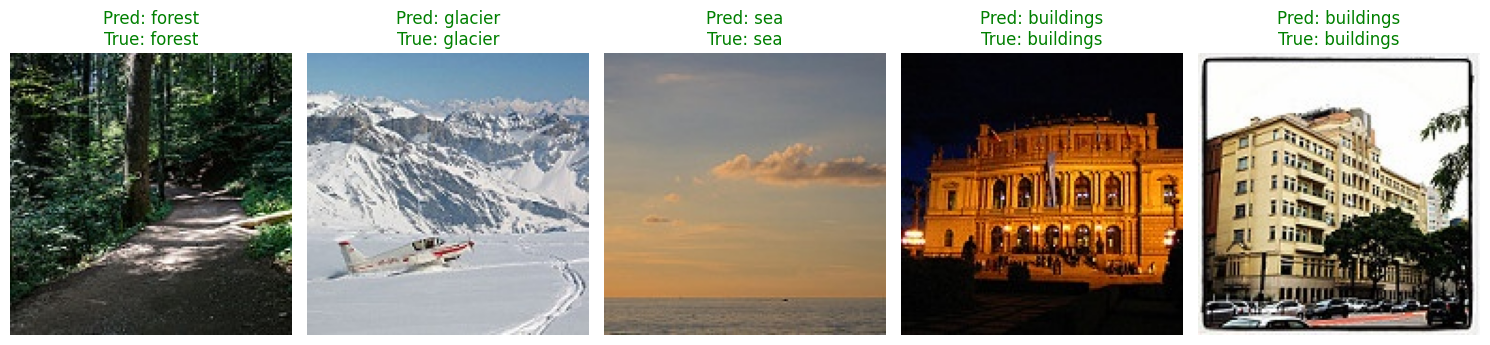

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

# Invierte los índices de las clases para obtener un mapeo de índice a nombre de la clase
idx_to_class = {v: k for k, v in test_generator.class_indices.items()}

# Elige cuántas muestras deseas mostrar
num_samples_to_show = 5

# Selecciona aleatoriamente algunos índices del conjunto de prueba
test_indices = random.sample(range(len(test_generator.filenames)), num_samples_to_show)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(test_indices, start=1):
    img_path = test_generator.filepaths[idx]  # Ruta completa de la imagen
    img = Image.open(img_path)

    # Etiquetas reales y predichas
    actual_label = idx_to_class[y_true[idx]]
    predicted_label = idx_to_class[y_pred[idx]]

    plt.subplot(1, num_samples_to_show, i)
    plt.imshow(img)
    plt.axis('off')
    # Muestra las etiquetas reales y predichas
    plt.title(f"Pred: {predicted_label}\nTrue: {actual_label}", color=("green" if predicted_label == actual_label else "red"))

plt.tight_layout()
plt.show()

En esta celda, se guarda el modelo entrenado en un archivo con formato H5
(`scene_classification_model.h5`) utilizando la función `save` de Keras. Este archivo incluye la
arquitectura del modelo, los pesos entrenados y la configuración de compilación, lo que permite
recargar el modelo más tarde sin necesidad de volver a entrenarlo.
La impresión de "Model saved successfully." confirma que el proceso de guardado se ha completado
correctamente, asegurando que se puede utilizar el modelo en futuras aplicaciones o para desplegarlo
en producción.


In [ ]:
# Guarda el modelo
model.save('scene_classification_model.h5')
print("Model saved successfully.")

Model saved successfully.


En esta celda se integra el proceso completo para evaluar nuevas imágenes utilizando un modelo previamente entrenado y almacenado. A continuación se detallan los puntos clave del código y su función:

1. **Carga del modelo:**  
   Se utiliza `load_model` para cargar un modelo previamente entrenado desde un archivo `.h5`. Esto permite reutilizar el modelo sin necesidad de reentrenarlo. La ruta `MODEL_PATH` apunta a un archivo, en este caso Google Drive (`scene_classification_model.h5`), el cual fue generado tras el entrenamiento en un paso anterior.

2. **Definición de categorías:**  
   La lista `CATEGORIES` contiene las etiquetas de las clases que el modelo puede predecir. Cada índice en esta lista corresponde a un índice en la salida del modelo. Por ejemplo, si `model.predict` retorna un vector de 6 probabilidades, cada posición en dicho vector se asocia a una categoría en la lista.

3. **Lectura de imágenes desde una carpeta:**  
   La variable `IMAGES_FOLDER` apunta a un directorio en el cual se encuentran las imágenes que se quieren clasificar. Estas imágenes no forman parte del conjunto de entrenamiento o validación, sino que se utilizan para probar el modelo en datos nuevos, simulando su uso en un entorno real.

4. **Preprocesamiento de las imágenes:**  
   Dentro de la función `predict_images`, por cada archivo de imagen en el directorio especificado:
   - Se carga la imagen con `load_img`, redimensionándola al tamaño de entrada esperado por el modelo (`IMG_SIZE`), garantizando que la imagen cumpla con las dimensiones requeridas.
   - La imagen se convierte a un array NumPy y se normaliza dividiendo los valores de píxel por 255.0, lo que asegura que la escala de valores sea la misma que se utilizó durante el entrenamiento.
   - Se expande la dimensión del array para simular un lote de tamaño 1, ya que `model.predict` espera una colección de imágenes, no solo una.

5. **Predicción con el modelo:**  
   Para cada imagen, se invoca `model.predict(img_array)`, obteniendo un vector de probabilidades para cada categoría. A través de `np.argmax`, se identifica la clase con mayor probabilidad, mapeándola a la etiqueta correspondiente en `CATEGORIES`.

6. **Manejo de errores:**  
   Si se produce algún problema al leer o procesar una imagen (por ejemplo, un formato no soportado o un error en la lectura del archivo), el bloque `try-except` captura la excepción y la asocia a esa imagen. Esto evita que un error aislado interrumpa el procesamiento de todas las imágenes.

7. **Almacenamiento y visualización de resultados:**  
   Los resultados se guardan en un diccionario donde la clave es el nombre del archivo y el valor es una tupla con (predicción, objeto imagen). Posteriormente, se iteran estos resultados, imprimiendo el nombre de la imagen y la clase predicha. Además, se muestra la imagen utilizando `matplotlib` con el título de la predicción, lo que facilita la inspección visual de la calidad de las predicciones del modelo.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Imagen: Troy Montaña.jpeg, Predicción: mountain


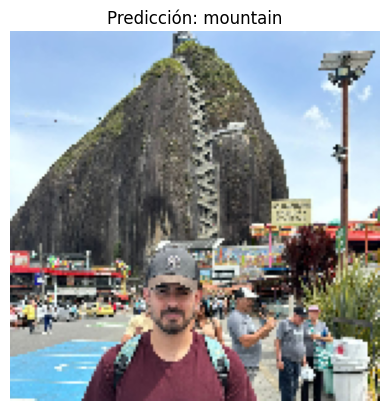

Imagen: Malta Cristopher.jpeg, Predicción: buildings


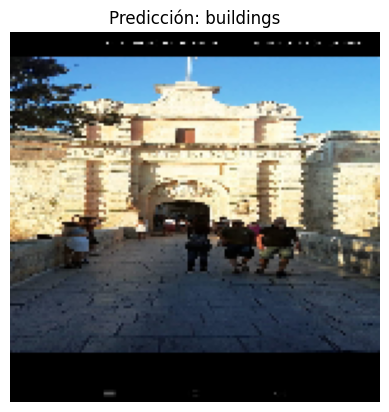

Imagen: Diego Glasiar.jpeg, Predicción: glacier


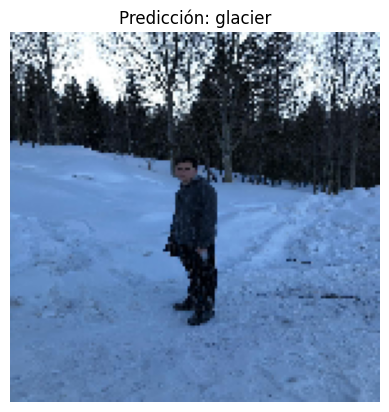

Imagen: Edificio Cristopher.jpeg, Predicción: street


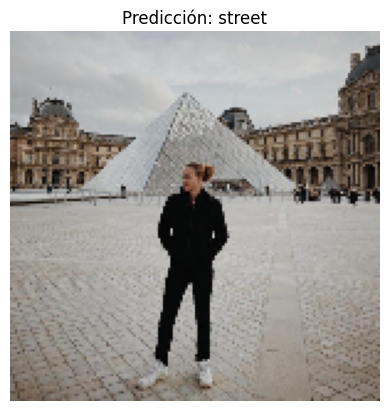

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Ruta del modelo cargado
MODEL_PATH = '/content/drive/MyDrive/Ot24/IA 2/scene_classification_model.h5'

# Cargar el modelo
model = load_model(MODEL_PATH)

# Definir las categorías
CATEGORIES = ['street', 'glacier', 'forest', 'sea', 'buildings', 'mountain']

# Ruta de la carpeta con las imágenes a analizar
IMAGES_FOLDER = '/content/drive/MyDrive/Ot24/IA 2/Fotos'


IMG_SIZE = (150, 150)

def predict_images(folder_path, model, categories, img_size):
    # Obtener una lista de archivos en la carpeta
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    # Almacenar resultados
    predictions = {}

    for image_file in image_files:
        try:
            # Ruta completa de la imagen
            img_path = os.path.join(folder_path, image_file)

            # Cargar y preprocesar la imagen
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Normalizar
            img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el batch

            # Hacer predicción
            prediction = model.predict(img_array)
            predicted_label = categories[np.argmax(prediction)]

            # Guardar resultado
            predictions[image_file] = (predicted_label, img)
        except Exception as e:
            predictions[image_file] = (f"Error al procesar: {e}", None)

    return predictions

# Ejecutar las predicciones
results = predict_images(IMAGES_FOLDER, model, CATEGORIES, IMG_SIZE)

# Mostrar resultados
for image_name, (prediction, image) in results.items():
    print(f"Imagen: {image_name}, Predicción: {prediction}")
    if image is not None:
        plt.imshow(image)
        plt.title(f"Predicción: {prediction}")
        plt.axis('off')
        plt.show()

# Conclusiones

En este proyecto se puede destacar un modelo de aprendizaje profundo para la clasificación de escenas naturales, logrando una precisión del **87.83%**. La adopción de la arquitectura **VGG16** y la aplicación de técnicas como la **transferencia de aprendizaje** y el **aumento de datos** fueron fundamentales para superar desafíos como la variabilidad de las escenas y la alta dimensionalidad de los datos.

- **Resultados Clave:**
  - **Precisión del Modelo:** 87.83% en el conjunto de prueba.
  - **Eficiencia del Modelo:** Reducción de sobreajuste mediante capas de regularización y ajustes de hiperparámetros.
  - **Matriz de Confusión:** Demostró un buen desempeño general, con algunas confusiones entre clases similares como "Mountain" y "Glacier".

En términos de **aplicación práctica**, este modelo establece una base sólida para el desarrollo de aplicaciones móviles que proporcionen descripciones contextuales automáticas de fotografías. Esto puede tener un impacto significativo en diversos sectores:

- **Turismo:** Permite a los usuarios obtener información detallada sobre las ubicaciones de sus fotos, mejorando la experiencia de viaje.
- **Organización Personal:** Mejora la gestión y clasificación automática de fotografías, ofreciendo valor añadido a los usuarios mediante información relevante y contextualizada.

La integración de este sistema no solo optimiza la organización de imágenes, sino que también proporciona datos precisos y útiles de manera instantánea, respondiendo eficazmente a necesidades reales en múltiples áreas.

# Referencias
* Bansal, P. (2018). *Intel Image Classification*. https://www.kaggle.com/datasets/puneet6060/intel-image-classification
* Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
* Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional
neural networks. En Advances in Neural Information Processing Systems (pp. 1097-1105).
* LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436-444.
https://doi.org/10.1038/nature14539
* Russakovsky, O., Deng, J., Su, H., Krause, J., Satheesh, S., Ma, S., ... & Fei-Fei, L. (2015). Imagenet large
scale visual recognition challenge. International Journal of Computer Vision, 115(3), 211-252.
https://doi.org/10.1007/s11263-015-0816-y
* Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image
recognition. arXiv preprint arXiv:1409.1556.
* Yosinski, J., Clune, J., Bengio, Y., & Lipson, H. (2014). How transferable are features in deep neural
networks? En Advances in Neural Information Processing Systems (pp. 3320-3328).
* Zhu, X., Zhang, Z., & Gong, S. (2017). Scene classification: A comprehensive review. Neurocomputing, 273,
195-209. https://doi.org/10.1016/j.neucom.2017.06.037


# Código Honor
Damos nuestra palabra que hemos realizado con integridad académica.